In [1]:
%run ./CoreFunctions.ipynb

In [2]:
playsound(444,444)

In [3]:
# the main parameteres are collected below

In [4]:
Grid_size = 11

In [5]:
aas = np.linspace(start=-1.5, stop=2.2, num=Grid_size)   #grid of points for which computation of Log(I_p/I_u) takes place
                                                  # start is the first, stop is the last, num is the number of points
bbs = np.linspace(start=-2.5, stop= 1.2, num=Grid_size)

In [6]:
Q_value = 36382

In [7]:
SaveResults = False

In [8]:
Pol_Pop = pd.read_csv("beta_30_Pl_AA.csv")
PolPopulation = np.array(Pol_Pop["SourcePopulation"])
PolPopulation = np.sort(PolPopulation)

In [9]:
#plt.hist(np.log(PolPopulation), bins = 20)
#plt.title("Histogram of Log of Polish city sizes")
#plt.savefig('Hist_of_Polish_City_Sizes.png', bbox_inches='tight')
#plt.show()

In [10]:
N_iterations = 39
N_cities =  len(PolPopulation)

In [11]:
# kI  does not! affect the ratio I_p/I_u!
kI = 0.00001

In [12]:
# initialize cities array. The distribution is given manually
if False:    
    def initialize_cities_array():
        
        # zeroth column is city size y, first is beta(y), second is pi_p(y), third  pi_U(y)
        zeta      = np.zeros((N_cities, 4))
        zeta[0,0] = 1000
        zeta[1,0] = 37430
        zeta[2,0] = 200627
        zeta[3,0] = 3874465
        
        zeta[0,1] = 0.39
        zeta[1,1] = 0.51
        zeta[2,1] = 0.08
        zeta[3,1] = 0.02
        
        zeta[:,2] = 0.99 #placeholder
        zeta[:,3] = 0.99  #placeholder
    
    
        return zeta

In [13]:
# for Poland all city sizes are unique

def initialize_cities_array():
    
    # zeroth column is city size y, first is beta(y), second is pi_p(y), third  pi_U(y)
    zeta      = np.zeros((N_cities, 4))
    zeta[:,0] = PolPopulation
 
    
    zeta[:,1] = 1/N_cities
    
    zeta[:,2] = 0.99 #placeholder
    zeta[:,3] = 0.99  #placeholder


    return zeta

In [14]:
maxQ_value()

112073.91788856301

In [15]:
# it can be checked here that kI does not affect the ration
#kI = 0.0001

#ick = Compute_Is(1,1,22542)
#print(ick)
#print(ick[0]/ick[1])

In [16]:
if Q_value > maxQ_value() - 0.1:
    raise ValueError("Q_value is too high!")

In [17]:
#with open('a_boundary_curve_1st_computation.pkl', 'rb') as file2:
#    Boundary_curve_map = pickle.load(file2)

In [18]:


    
# get cartesian product of aas and bbs
df = pd.MultiIndex.from_product([aas, bbs], names = ["a", "b"])
df = pd.DataFrame(index = df).reset_index()
zeros = np.zeros(( df.shape[0],1))
df["LogIpOverIu"] = zeros  
df = df.sample(frac=1).reset_index(drop=True)  #shuffle rows

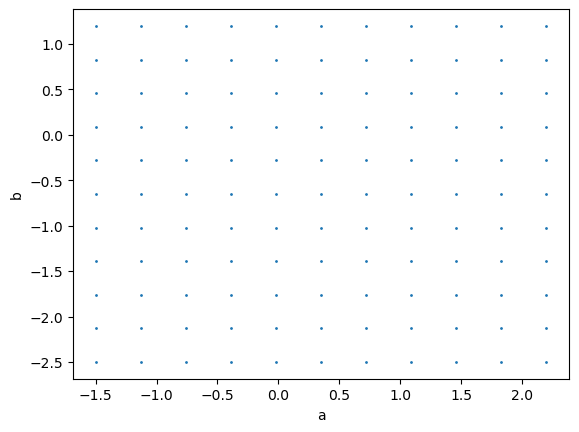

In [19]:
    plt.scatter(df["a"], df["b"], s=1)
    plt.ylabel('b')
    plt.xlabel('a')
    plt.show()

In [20]:
playsound(340, 1111)

In [21]:



    startTime = time.time()
    
    for i in range(df.shape[0]):
        ick = Compute_Is(df["a"][i], df["b"][i], Q_value)
        df["LogIpOverIu"][i] = math.log(ick[0]) - math.log(ick[1])
        
        if  i%73 == 8:
            print("ETA for Ip and Iu computation  = " +
                      str( (df.shape[0] - i - 1) *(time.time() - startTime)/(i+1) ) + " seconds")
            print("Average number of seconds per iteration up to now = "
                  + str((time.time() - startTime)/(i+1)) + " seconds")
            
    print("Total time for the loop = " + str(time.time() - startTime) + " seconds")
    print("Average number of seconds per iteration for the loop = "
          + str((time.time() - startTime)/(i+1)) + " seconds")
    


ETA for Ip and Iu computation  = 111.97286546230316 seconds
Average number of seconds per iteration up to now = 0.9570330381393433 seconds
ETA for Ip and Iu computation  = 102.2794582077435 seconds
Average number of seconds per iteration up to now = 1.0997791205133711 seconds
ETA for Ip and Iu computation  = 78.82775435080895 seconds
Average number of seconds per iteration up to now = 1.142431222475492 seconds
ETA for Ip and Iu computation  = 50.61532033117194 seconds
Average number of seconds per iteration up to now = 1.1247914307995845 seconds
ETA for Ip and Iu computation  = 24.287427978515623 seconds
Average number of seconds per iteration up to now = 1.156544189453125 seconds
Total time for the loop = 144.2091679573059 seconds
Average number of seconds per iteration for the loop = 1.1918113054322803 seconds


In [22]:
playsound(440, 2111)

In [23]:
np.max(df["a"])

2.2

In [24]:
Color_var = np.array(df["LogIpOverIu"]) 

MinValue = np.min(Color_var)
MaxValue = np.max(Color_var)

scaled_Color_var = np.zeros(np.shape(Color_var))

for i in range(np.shape(Color_var)[0]): 
    # colors are scaled piece-wisely linear in such a way that scaled_Color_var[i] = 0 if 
    # Color_var[i] = 0. In this way if df["LogIpOverIu"][i] = 0, the color is gonna be in the middle between red and blue.
    z = Color_var[i]
 
    if z < 0:
        scaled_Color_var[i] = 0.5 - 0.5*z/MinValue  
    else:
        scaled_Color_var[i] = 0.5 + 0.5*z/MaxValue 
        

colors = plt.cm.coolwarm(scaled_Color_var)

def inverse_color_transform(s):
    if s >= 0.5:
        return_value = MaxValue*(2*s-1)
    else:
        return_value = MinValue*(1-2*s)
    return return_value

In [25]:
plt.cm.coolwarm(0.5)

(0.8674276350862745, 0.864376599772549, 0.8626024620196079, 1.0)

In [26]:
inverse_color_transform(0.9)

0.6124360589954819

In [27]:
import matplotlib.patches as mpatches

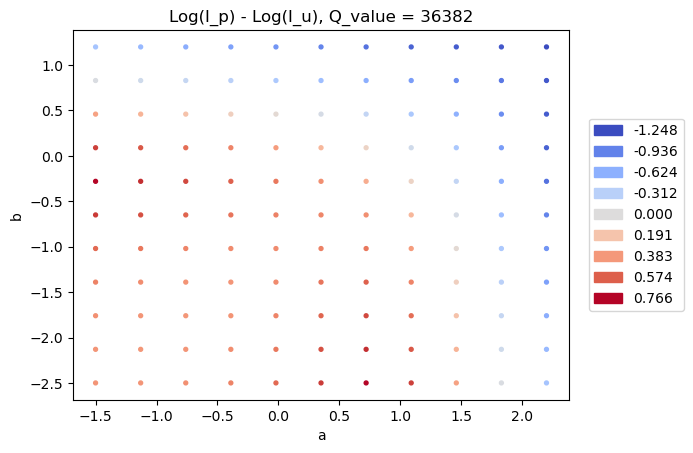

In [28]:
plt.scatter(df["a"], df["b"],  color=colors, s=7.8)
plt.ylabel('b')
plt.xlabel('a')
plt.title('Log(I_p) - Log(I_u), Q_value = ' + str(Q_value))


patches = []

Numbers_from_0_to_1 = np.linspace(start = 0, stop = 1, num = 9)

for i in range(np.shape(Numbers_from_0_to_1)[0]):
    patches.append(mpatches.Patch(color=plt.cm.coolwarm(Numbers_from_0_to_1[i]),
                                  label= '{0:.3f}'.format(inverse_color_transform(Numbers_from_0_to_1[i])) ) )


plt.legend(handles=patches, bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
if SaveResults == True:
    plt.savefig('Computation over grid' + str(int(time.time()//1)) + '.png', bbox_inches='tight')
plt.show()

In [29]:
if SaveResults == True:
    fileObj = open('df_Poland'  + str(int(time.time()//1)) + '.pkl', 'wb')
    pickle.dump(df,fileObj)
    fileObj.close()